In [1]:
import pandas as pd

In [3]:
# Load the datasets
athlete_events_df = pd.read_csv('../Resources/DataFrames/Cleaned/athleteEventsAggFinalNaN.csv')
disaster_data_df = pd.read_csv('../Resources/DataFrames/Possible_factors/Natural_Disaster/cleaned/Disaster_data_cleaned.csv')

In [4]:
# Display the first few rows of each dataset to understand their structure
athlete_events_df.head()

,Year,NOC,Total Athletes,Medal Count,Average Age (M),Average Height (M),Average Weight (M),Average Age (F),Average Height (F),Average Weight (F)
0,1896,AUS,3,4.0,22.250000,NaN,NaN,NaN,NaN,NaN
1,1896,AUT,3,5.0,21.750000,NaN,NaN,NaN,NaN,NaN
2,1896,DEN,3,6.0,25.933333,NaN,NaN,NaN,NaN,NaN
3,1896,FRA,12,11.0,19.789474,NaN,NaN,NaN,NaN,NaN
4,1896,GBR,14,11.0,23.941176,188.0,102.0,NaN,NaN,NaN


In [5]:
disaster_data_df.head()

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Location,Associated Types,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Start Year,End Year,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,"Total Damage, Adjusted ('000 US$)",CPI (Community Preparedness Index)
0,Natural,Meteorological,Storm,Tropical cyclone,USA,United States of America,Galveston (Texas),"Avalanche (Snow, Debris)",NaN,220.0,Kph,1900,1900,6000.0,NaN,NaN,NaN,NaN,1098720.0,2.730451
1,Technological,Industrial accident,Fire (Industrial),Fire (Industrial),USA,United States of America,"Hoboken, New York, Piers",Explosion,NaN,NaN,m3,1900,1900,300.0,NaN,NaN,NaN,NaN,NaN,2.730451
2,Natural,Hydrological,Flood,Flood (General),JAM,Jamaica,Saint James,NaN,NaN,NaN,Km2,1900,1900,300.0,NaN,NaN,NaN,NaN,NaN,2.730451
3,Natural,Biological,Epidemic,Viral disease,JAM,Jamaica,Porus,NaN,NaN,NaN,Vaccinated,1900,1900,30.0,NaN,NaN,NaN,NaN,NaN,2.730451
4,Natural,Geophysical,Volcanic activity,Ash fall,JPN,Japan,NaN,NaN,NaN,NaN,NaN,1900,1900,30.0,NaN,NaN,NaN,NaN,NaN,2.730451


In [6]:
# Aggregate disaster data per year and country
disaster_agg = disaster_data_df.groupby(['ISO', 'Start Year']).agg({
    'Total Deaths': 'sum',
    'No. Injured': 'sum',
    'Total Affected': 'sum',
    'Total Damage, Adjusted (\'000 US$)': 'sum'
}).reset_index()

In [7]:
# Merge the datasets
merged_df = pd.merge(athlete_events_df, disaster_agg, left_on=['NOC', 'Year'], right_on=['ISO', 'Start Year'], how='left')

In [8]:
# Display the merged dataset
merged_df

,Year,NOC,Total Athletes,Medal Count,Average Age (M),Average Height (M),Average Weight (M),Average Age (F),Average Height (F),Average Weight (F),ISO,Start Year,Total Deaths,No. Injured,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,1896,AUS,3,4.0,22.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1896,AUT,3,5.0,21.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1896,DEN,3,6.0,25.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1896,FRA,12,11.0,19.789474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1896,GBR,14,11.0,23.941176,188.000000,102.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,2016,VIE,22,2.0,31.000000,170.000000,67.416667,23.812500,164.875000,53.875000,NaN,NaN,NaN,NaN,NaN,NaN
3306,2016,VIN,4,0.0,18.500000,173.000000,55.000000,23.000000,178.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN
3307,2016,YEM,3,0.0,21.000000,171.500000,68.500000,16.000000,166.000000,60.000000,YEM,2016.0,111.0,200.0,29950.0,0.0
3308,2016,ZAM,7,0.0,25.000000,174.750000,68.750000,22.000000,176.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Display the dataset to ensure no missing values
print(merged_df.isnull().sum())

Year                                 0
NOC                                  0
Total Athletes                       0
Medal Count                          0
Average Age (M)                      0
Average Height (M)                   0
Average Weight (M)                   0
Average Age (F)                      0
Average Height (F)                   0
Average Weight (F)                   0
ISO                                  0
Start Year                           0
Total Deaths                         0
No. Injured                          0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
# Define the features and target variable
features = merged_df.drop(columns=['Medal Count', 'NOC', 'ISO', 'Start Year', 'Year'])
target = merged_df['Medal Count']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
# # Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# # Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
# # Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 7.750261832829809


                              Feature  Importance
0                      Total Athletes    0.805884
5                  Average Height (F)    0.039806
6                  Average Weight (F)    0.030556
3                  Average Weight (M)    0.026559
1                     Average Age (M)    0.022231
4                     Average Age (F)    0.021532
2                  Average Height (M)    0.020428
7                        Total Deaths    0.011163
10  Total Damage, Adjusted ('000 US$)    0.010878
9                      Total Affected    0.007246
8                         No. Injured    0.003717


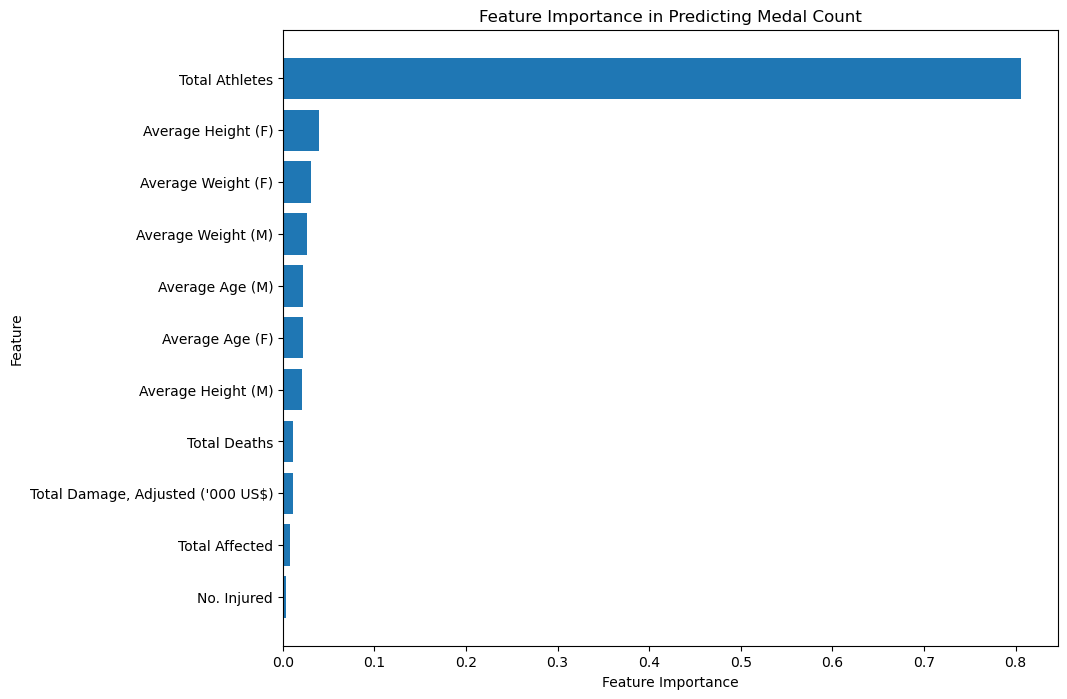

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the features by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
# Display the feature importance
print(feature_importance_df)
# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Medal Count')
plt.gca().invert_yaxis()
plt.show()